In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import numpy as np
import importlib

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d

from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf

# %matplotlib notebook


tr2 167.446084914 -505.236544558
tr3 2156.02129965 -2156.02129965
delta 1247475.15603 -129399643.506


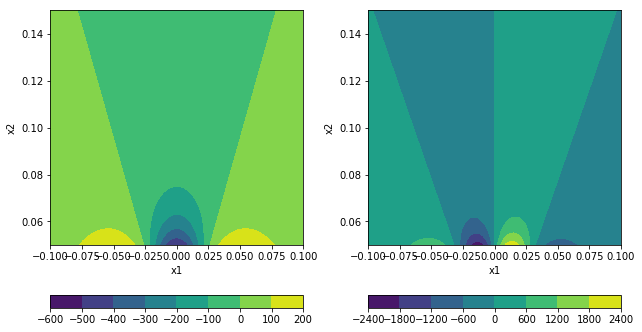

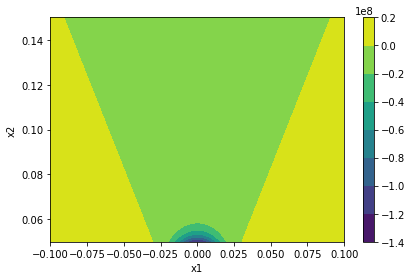

In [2]:
# The phase map of the possible motions of elliptic paritcls. 
# assuming a flow due to point force. 

TrB2_fun = lambda x1, x2, x3, lbd: (-1 / 32) * np.pi ** (-2) * (x1 ** 2 + x2 ** 2 + x3 ** 2) ** (-3) * (
                                x2 ** 2 + x3 ** 2 + (-3) * x1 ** 2 * lbd ** 2)
TrB3_fun = lambda x1, x2, x3, lbd: (3 / 512) * np.pi ** (-3) * x1 * (x1 ** 2 + x2 ** 2 + x3 ** 2) ** (-9 / 2) * lbd * (
                                x2 ** 2 + x3 ** 2 + (-2) * x1 ** 2 * lbd ** 2)

lbd = 1.1
x1 = np.linspace(-0.1, 0.1, 100)
x2 = np.linspace(0.05, 0.15, 100)
x1, x2 = np.meshgrid(x1, x2)
tr2 = TrB2_fun(x1, x2, 0, lbd)
tr3 = TrB3_fun(x1, x2, 0, lbd)
delta = tr2 ** 3 - 6 * tr3 ** 2
print('tr2', tr2.max(), tr2.min())
print('tr3', tr3.max(), tr3.min())
print('delta', delta.max(), delta.min())

fig = plt.figure(figsize=(9, 5))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
cf = ax0.contourf(x1, x2, tr2)
plt.colorbar(cf, ax=ax0, orientation='horizontal')
ax0.set_xlabel('x1')
ax0.set_ylabel('x2')
cf = ax1.contourf(x1, x2, tr3)
plt.colorbar(cf, ax=ax1, orientation='horizontal')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
plt.tight_layout()

fig = plt.figure(figsize=(6, 4))
fig.patch.set_facecolor('white')
ax2 = fig.add_subplot(1, 1, 1)
cf = ax2.contourf(x1, x2, delta)
# cf = ax2.contourf(x1, x2, tr2)
plt.colorbar(cf, ax=ax2, orientation='vertical')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
plt.tight_layout()


In [3]:
importlib.reload(jm)
TrB2_fun = lambda x1, x2, x3, lbd: (-1 / 32) * np.pi ** (-2) * (x1 ** 2 + x2 ** 2 + x3 ** 2) ** (-3) * (
                                x2 ** 2 + x3 ** 2 + (-3) * x1 ** 2 * lbd ** 2)
TrB3_fun = lambda x1, x2, x3, lbd: (3 / 512) * np.pi ** (-3) * x1 * (x1 ** 2 + x2 ** 2 + x3 ** 2) ** (-9 / 2) * lbd * (
                                x2 ** 2 + x3 ** 2 + (-2) * x1 ** 2 * lbd ** 2)

StokesletsStrength = np.array((1, 0, 0))
alpha = 1.1
lbd = (alpha ** 2 - 1) / (alpha ** 2 + 1)
x1 = 0.
x2 = 0.1
x3 = 0
problem = jm.SingleStokesletsJefferyProblem(StokesletsStrength=StokesletsStrength)

location = np.array((x1, x2, x3))
Sij, Oij = problem.flow_strain_rotation(location)
Bij = Oij + lbd * Sij
B2 = np.dot(Bij, Bij)
B3 = np.dot(B2, Bij)
TrB2 = np.trace(B2)
TrB3 = np.trace(B3)

tw, _ = np.linalg.eig(Bij)
print(TrB2, TrB2_fun(x1, x2, x3, lbd))
print(TrB3, TrB3_fun(x1, x2, x3, lbd))
print(tw)
print(TrB2 ** 3 - 6 * TrB3 ** 2)


-31.6628698882 -31.662869888230542
0.0 0.0
[ 0.+3.97887j  0.-3.97887j  0.+0.j     ]
-31743.2090239


In [4]:
importlib.reload(jm)

eval_dt = 0.1
max_iter = 10001
fileHandle = 'SingleStokesletsJefferyProblem'

alpha = alpha_list[2]
norm = norm_list[2]
center = center_list[2]
ellipse_kwargs = {'name':     'ellipse0',
                  'center':   center,
                  'norm':     norm / np.linalg.norm(norm),
                  'velocity': 0.000,
                  'lbd':      (alpha ** 2 - 1) / (alpha ** 2 + 1)}
ellipse_obj = jm.JefferyObj(**ellipse_kwargs)
ellipse_obj.dbg_set_update_para(fix_x=0, fix_y=0, fix_z=0)
problem = jm.SingleStokesletsJefferyProblem(StokesletsStrength=(1, 0, 0))
problem.add_obj(ellipse_obj)

# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
center_hist = np.vstack(ellipse_obj.center_hist)
U_hist = np.vstack(ellipse_obj.U_hist)
norm_hist = np.vstack(ellipse_obj.norm_hist)

fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
ax0.plot(norm_hist[:, 0])
ax1.plot(norm_hist[:, 1])
ax2.plot(norm_hist[:, 2])
plt.tight_layout()

t_stp = max_iter // 50
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1, projection='3d')
cm = plt.get_cmap('cool')
color_len = center_hist[::t_stp, 0].size
colors = [cm(1.*i/color_len) for i in range(color_len)]
ax0.plot(center_hist[:, 0], center_hist[:, 1], center_hist[:, 2],)
ax0.quiver(center_hist[::t_stp, 0], center_hist[::t_stp, 1], center_hist[::t_stp, 2], 
           norm_hist[::t_stp, 0], norm_hist[::t_stp, 1], norm_hist[::t_stp, 2], 
           length=0.001*max_iter, arrow_length_ratio=0.2, pivot='tail', normalize=False, colors=colors)
spf.set_axes_equal(ax0)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_zlabel('Z')
ax0.set_title('')


NameError: name 'alpha_list' is not defined

SingleStokesletsJefferyProblem: run 1001 loops using 2.379645


Text(0.5, 0.92, '')

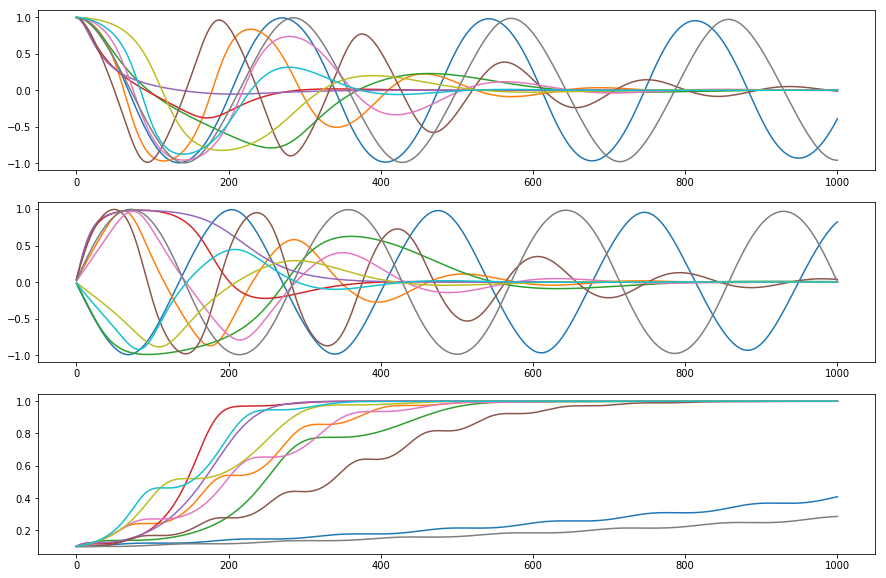

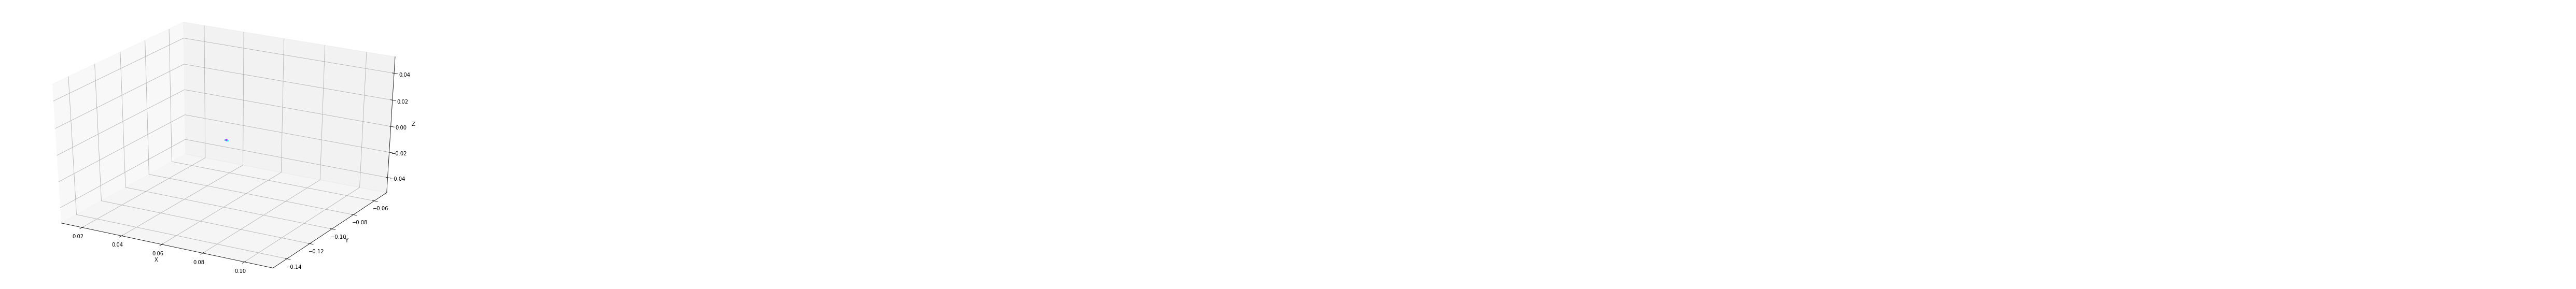

In [51]:
importlib.reload(jm)
fileHandle = 'SingleStokesletsJefferyProblem'
eval_dt = 0.01
max_iter = 1001
ellipse_velocity = 0
StokesletsStrength = (1, 0, 0)
n_total = 10   # total of objs to evolution
problem = jm.SingleStokesletsJefferyProblem(StokesletsStrength=StokesletsStrength)

# generate objs
alpha_list = np.ones(n_total)
norm_list = np.ones((n_total, 3))
center_list = np.ones((n_total, 3))
ellipse_obj_list = []
tn = 0
while tn < n_total:
    talpha = 10 ** (np.random.sample(1) * 0.6 - 0.3)
#     talpha = 1.1
#     tnorm = np.random.sample(3)
    tnorm = np.array((10, 0, 1))
    tcenter = (np.random.sample(3) * 0.2 - (0.1, 0.1, 0.1)) * (1, 1, 0)
#     tcenter = np.array((-0.1, 0.1, 0))
    tlbd = (talpha ** 2 - 1) / (talpha ** 2 + 1)
    t1 = tcenter[0] * tlbd
    t2 = 9 * tcenter[0] ** 2 * tlbd ** 2 - 4 * (tcenter[1] ** 2 + tcenter[2] ** 2) 
    
#     # case 1, see Einarsson, J. (2015).Angular dynamics of small particles in fluids
#     if t1 > 0 and t2 > 0: 

#     # case 2, see Einarsson, J. (2015).Angular dynamics of small particles in fluids
#     if t1 > 0 and t2 < 0 and np.linalg.norm(tcenter) > 0.1: 

#     # case 3, see Einarsson, J. (2015).Angular dynamics of small particles in fluids
#     if t1 < 0 and t2 < 0 and np.linalg.norm(tcenter) > 0.1: 
#         alpha_list[tn] = talpha
#         norm_list[tn] = tnorm
#         center_list[tn] = tcenter
#         tn = tn + 1

for tn, (talpha, tnorm, tcenter) in enumerate(zip(alpha_list, norm_list, center_list )):
        ellipse_kwargs = {'name':     'ellipse%03d' % tn,
                          'center':   tcenter,
                          'norm':     tnorm / np.linalg.norm(tnorm),
                          'velocity': ellipse_velocity,
                          'lbd':      (talpha ** 2 - 1) / (talpha ** 2 + 1)}
        tellipse_obj = jm.JefferyObj(**ellipse_kwargs)
        tellipse_obj.dbg_set_update_para(fix_x=0, fix_y=0, fix_z=0)
        problem.add_obj(tellipse_obj)
        ellipse_obj_list.append(tellipse_obj)
        
# evaluation loop
t0 = time()
for idx in range(1, max_iter + 1):
    problem.update_location(eval_dt, print_handle='%d / %d' % (idx, max_iter))
t1 = time()
print('%s: run %d loops using %f' % (fileHandle, max_iter, (t1 - t0)))
#     print(alpha, norm, center, problem.planeShearRate)
#     print(norm / np.linalg.norm(norm))
#     print(np.vstack(ellipse_obj.norm_hist))


fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
for ellipse_obj in ellipse_obj_list:
    center_hist = np.vstack(ellipse_obj.center_hist)
    U_hist = np.vstack(ellipse_obj.U_hist)
    norm_hist = np.vstack(ellipse_obj.norm_hist)
    ax0.plot(norm_hist[:, 0])
    ax1.plot(norm_hist[:, 1])
    ax2.plot(norm_hist[:, 2])
# plt.tight_layout()

t_stp = max_iter // 50
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1, projection='3d')
cm = plt.get_cmap('cool')
color_len = center_hist[::t_stp, 0].size
colors = [cm(1.*i/color_len) for i in range(color_len)]
ax0.plot(center_hist[:, 0], center_hist[:, 1], center_hist[:, 2],)
ax0.quiver(center_hist[::t_stp, 0], center_hist[::t_stp, 1], center_hist[::t_stp, 2], 
           norm_hist[::t_stp, 0], norm_hist[::t_stp, 1], norm_hist[::t_stp, 2], 
           length=0.001, arrow_length_ratio=0.2, pivot='tail', normalize=False, colors=colors)
spf.set_axes_equal(ax0)
ax0.set_xlabel('X')
ax0.set_ylabel('Y')
ax0.set_zlabel('Z')
ax0.set_title('')
# plt.tight_layout()

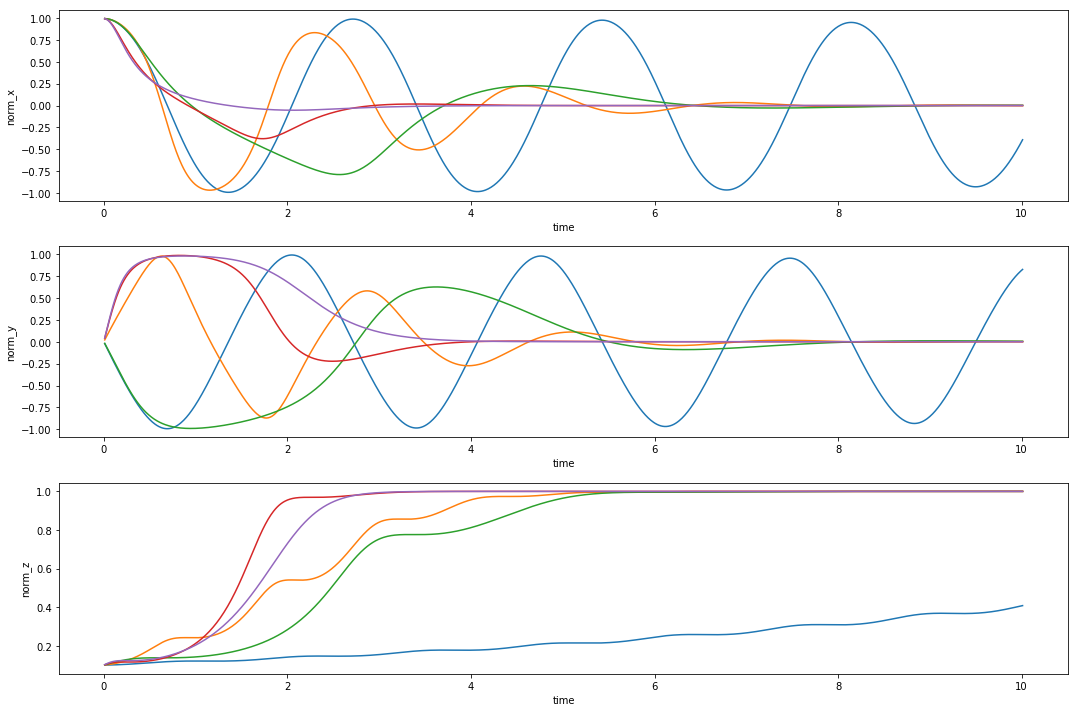

In [52]:
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(3, 1, 1)
ax1 = fig.add_subplot(3, 1, 2)
ax2 = fig.add_subplot(3, 1, 3)
t0 = np.arange(max_iter) * eval_dt + eval_dt
for i0, ellipse_obj in enumerate(ellipse_obj_list[:5]):
    center_hist = np.vstack(ellipse_obj.center_hist)
    U_hist = np.vstack(ellipse_obj.U_hist)
    norm_hist = np.vstack(ellipse_obj.norm_hist)
    ax0.plot(t0, norm_hist[:, 0], label=i0)
    ax1.plot(t0, norm_hist[:, 1], label=i0)
    ax2.plot(t0, norm_hist[:, 2], label=i0)
for axi, axyi in zip((ax0, ax1, ax2, ), ('x', 'y', 'z')):
    axi.set_xlabel('time')
    axi.set_ylabel('norm_%s' % axyi)
    # axi.legend()
plt.tight_layout()

In [13]:
0.0000001*max_iter

0.0100001